<a href="https://colab.research.google.com/github/Msamuelsons/boston-housing/blob/main/Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/sample_data/housing.csv')
dados.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [3]:
isnull = dados.isnull().sum()
isnull

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
matriz_correlacao = dados.corr()
matriz_correlacao

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


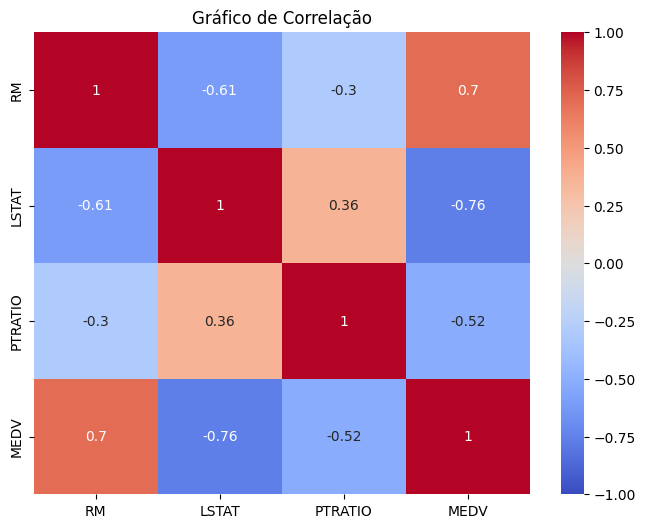

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Gráfico de Correlação')
plt.show()

# Separação de x e y

In [7]:
y = dados['MEDV']
x = dados.drop('MEDV', axis=1)


In [8]:
x

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
484,6.593,9.67,21.0
485,6.120,9.08,21.0
486,6.976,5.64,21.0
487,6.794,6.48,21.0


In [9]:
y

0      504000.0
1      453600.0
2      728700.0
3      701400.0
4      760200.0
         ...   
484    470400.0
485    432600.0
486    501900.0
487    462000.0
488    249900.0
Name: MEDV, Length: 489, dtype: float64

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [11]:
valores = {'alpha':[0.1, 0.5,1,2,5,10,25,50,100,150,200,300,500,750,1000,1500,2000,3000,5000],'l1_ratio': [0.02,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

In [12]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

## ElasticNet

In [13]:
from sklearn.linear_model import ElasticNet

In [14]:
elasticNet = ElasticNet()
modelo = GridSearchCV(estimator=elasticNet, param_grid=valores,cv=5)
modelo.fit(x, y)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 1, 2, 5, 10, 25, 50, 100, 150, 200,
                                   300, 500, 750, 1000, 1500, 2000, 3000,
                                   5000],
                         'l1_ratio': [0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                      0.7, 0.8, 0.9]})

In [15]:
modelo_elastic = cross_val_score(elasticNet, x, y, cv=kfold)
print(modelo.best_estimator_)
print(modelo_elastic.mean())
elastic_modelo = modelo_elastic.mean()

ElasticNet(alpha=0.5)
0.6778072546220331


## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()

In [17]:
modelo2 = cross_val_score(linearRegression, x, y, cv=kfold)

In [18]:
print(modelo2.mean())
linear_modelo = modelo2.mean()

0.7045836991989759


## Ridge

In [19]:
from sklearn.linear_model import Ridge
ridge = Ridge()
modelo3 = cross_val_score(ridge, x, y, cv=kfold)
ridge.fit(x, y)
print(modelo3.mean())

0.7046777395486561


In [20]:
ridge_search_alpha = {'alpha':[0.1, 0.5,1,2,5,10,25,50,100,150,200,300,500,750,1000,1500,2000,3000,5000]}

In [21]:
grid_ridge = GridSearchCV(estimator=ridge, param_grid=ridge_search_alpha, cv=5)

In [22]:
grid_ridge.fit(x, y)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.5, 1, 2, 5, 10, 25, 50, 100, 150, 200,
                                   300, 500, 750, 1000, 1500, 2000, 3000,
                                   5000]})

In [23]:
melhor_alpha = grid_ridge.best_estimator_
melhor_score = grid_ridge.best_score_
print(melhor_alpha)

Ridge(alpha=100)


In [24]:
ridge2 = Ridge(alpha=100)
ridge_modelo = cross_val_score(ridge2, x, y, cv=kfold)
ridge2.fit(x, y)

Ridge(alpha=100)

In [25]:
rid_modelo = ridge_modelo.mean()
rid_modelo

0.6905692607840731

## Lasso

In [26]:
from sklearn.linear_model import Lasso

In [27]:
lasso = Lasso()

In [28]:
alpha_lasso = [0.1, 0.5,1,2,5,10,25,50,100,150,200,300,500,750,1000,1500,2000,3000,5000]
max_iter_values = [ 10, 20,30,40,50,60,70,80,90, 100,200,300,400,500,600,700,800,900, 1000]
tol_values = [0.01, 0.1, 0.001]

In [29]:
param_lasso = {'alpha': alpha_lasso, 'max_iter': max_iter_values, 'tol':tol_values}

In [30]:
grid_lasso = GridSearchCV(estimator=lasso, param_grid=param_lasso, cv=kfold)

In [31]:
grid_lasso.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.251e+12, tolerance: 1.108e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.335e+12, tolerance: 1.007e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.075e+12, tolerance: 1.075e

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.5, 1, 2, 5, 10, 25, 50, 100, 150, 200,
                                   300, 500, 750, 1000, 1500, 2000, 3000,
                                   5000],
                         'max_iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                      200, 300, 400, 500, 600, 700, 800, 900,
                                      1000],
                         'tol': [0.01, 0.1, 0.001]})

In [32]:
lasso_modelo = cross_val_score(lasso,x, y, cv=kfold, scoring='r2')
lass_modelo = lasso_modelo.mean()


In [33]:
grid_lasso.best_estimator_


Lasso(alpha=150, max_iter=10, tol=0.1)

## Retornando o melhor modelo

In [34]:
def melhor_resultado(ridge, lasso, linear, elastic):
  return max(ridge, lasso, linear, elastic)


In [35]:
melhor_resultado(rid_modelo, linear_modelo, lass_modelo,elastic_modelo)

0.7045840489476441

## Previsões

In [36]:
from sklearn.model_selection import cross_val_predict

In [37]:
predicao = cross_val_predict(linearRegression, x, y, cv=5)

In [38]:
print(predicao.tolist())

[639040.0661975315, 528799.721518371, 647883.7450158838, 627000.8797832995, 611833.3027870688, 555801.4017849958, 511547.77240060066, 448173.5535592892, 282661.49519178143, 457965.85782960994, 449845.3062043045, 501784.9594502172, 464518.4444286517, 436030.150835414, 425123.7270854858, 424444.3033911297, 453954.8762185987, 366644.89551038283, 357683.68509663234, 384023.8608334736, 261039.07453170628, 374166.44773615117, 332898.8282718387, 293413.6500761999, 342883.3941207231, 314488.0912418256, 350889.8129509891, 341619.14145231654, 428266.928367471, 451890.9354470364, 254573.80961463467, 391687.1173141082, 215614.85702211154, 301793.48473166995, 310851.5926125321, 455194.07737830986, 428217.75318808545, 458866.57459248527, 452734.1286576351, 587218.8921406299, 648085.6680311328, 603452.3377543741, 544348.8515622622, 529232.2129675465, 493945.7593980766, 455486.23033998883, 419145.01919972606, 385961.1815758129, 199301.14970837836, 381176.86581995833, 463580.0858339808, 521319.74530146

## RandomizedSearchCV

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform
from scipy.stats import randint


In [98]:
novoModeloRidge = Ridge()

In [111]:
valores_2 = {
    'alpha': loguniform(0.1, 5000)
}
n_iter_valores = randint(50, 200)  # Intervalo de 50 a 199


In [116]:
procuraRidge = RandomizedSearchCV(estimator=novoModeloRidge, param_distributions=valores_2,n_iter=n_iter_valores.rvs(), cv=5, random_state=42)
procuraRidge.fit(x, y)

print(f'Melhor Score: {procuraRidge.best_score_*100:.2f}%')
print('Melhor alpha:', procuraRidge.best_estimator_.alpha)
print('Melhor melhor número de interação:', procuraRidge.n_iter)

Melhor Score: 47.23%
Melhor alpha: 99.05204218383898
Melhor alpha: 158


In [113]:
procuraRidge.fit(x, y)
melhor_alpha = procuraRidge.best_estimator_.alpha

# Usando o melhor alpha no novoModeloRidge
melhor_alpha = procuraRidge.best_estimator_.alpha
novoModeloRidge.set_params(alpha=melhor_alpha)


ridge3 = cross_val_score(novoModeloRidge,x, y, cv=kfold, scoring='r2')

In [114]:
ridge3.mean()

0.690725518670817